# IAC - 取得潛在IAC
1. InputData(input_path) : load評論資料(.csv or .xlsx)
2. GetIAC() : 抓潛在IAC
3. Save(output_path) : 存檔

In [1]:
from multiprocessing.dummy import Pool as ThreadPool
import Get_all_IAC

In [2]:
IAC = Get_all_IAC.Get_IAC()
IAC.InputData('LampSet/LampSet.xlsx')

Input success


In [3]:
IAC.GetIAC()

100%|██████████| 3731/3731 [02:52<00:00, 21.65it/s]

Get IAC success.


In [6]:
IAC.nlp.close()

In [ ]:
pool = ThreadPool(8)
results = pool.map(IAC.GetIAC(), IAC.sentences)

In [7]:
IAC.Save('LampSet/IAC.pkl')

Success save


In [9]:
IAC.IAC

['create',
 'switch',
 'clarity',
 'bedtime-stories',
 'memory',
 'cat-toys',
 'present',
 'light-settings',
 'snazzy',
 'control-feature',
 'last',
 'enable',
 'messy',
 'skewed',
 'fill',
 'introduction',
 'kid',
 'bathroom',
 'regular',
 'utf8',
 "'re",
 'others',
 '.',
 'strange',
 'we',
 'honest',
 'chip',
 'all',
 'magnify',
 'gold-shades',
 'bulb-base',
 'mocha',
 'extend',
 'com!the',
 'these',
 'porch-fan',
 'burn',
 'box-store',
 'gritty',
 'mobile',
 'wont',
 'electronics-work',
 'research',
 'br',
 'extensions-artist',
 'scan',
 'contact',
 'review-hater',
 'feel',
 'shoot',
 'sheen',
 '19',
 'wine',
 'reduce',
 'nope',
 'crease',
 'recommend',
 'same',
 'schedule-feature',
 'material',
 'bridge',
 'figure',
 'pack',
 'assemble',
 'appearance',
 'unpack',
 'fascinating',
 'power',
 'control!the',
 'difficult',
 'incredible',
 'cover',
 'near',
 'post',
 'individually',
 'off',
 'shortfall',
 'representation',
 'wonderful',
 'new',
 'stay',
 'function',
 'location',
 'un',
 

# Train Word2Vec - 訓練Word2Vec模型
1. 初始呼叫時就會將原有的所有評論load進來
2. add_data(input_path) : 加進新的資料
3. Train(dimension, min_word_count, context_window) : 訓練
4. Save(output_path) : 存檔

In [1]:
import Train_Word2Vec

In [2]:
train = Train_Word2Vec.Train_Word2vec()
train.load()

100%|██████████| 1197768/1197768 [32:10<00:00, 620.33it/s]


In [3]:
train.add_data('dataset/dataset/LampSet.xlsx')

In [4]:
train.Train(500, 10, 10)

Training model...
Finsih!


In [5]:
train.model.most_similar('small')

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('large', 0.8205270767211914),
 ('tiny', 0.7073460817337036),
 ('smallish', 0.5926549434661865),
 ('smaller', 0.5902241468429565),
 ('narrow', 0.5846545100212097),
 ('tall', 0.572284460067749),
 ('wide', 0.5643041133880615),
 ('shallow', 0.5634061098098755),
 ('larger', 0.5421552658081055),
 ('big', 0.5320311784744263)]

In [6]:
train.nlp.close()

In [ ]:
train.Save('LampSet/word2vec')

# Auto Keyword Extract - 自動分類
1. AutoLabeling(input_path) : 自動分類，input IAC
2. Save(output_path) : 存檔

In [7]:
import Auto_Keyword_Extract

In [8]:
label = Auto_Keyword_Extract.Auto_Keyword_Extract()

In [9]:
label.AutoLabeling('LampSet/IAC.pkl')

tilt: functionality
awesome: feeling
narrow: size
minimalist: appearance
boyfriend: target
fairly: feeling
beige: appearance
extremely: feeling
hesitant: feeling
headboard: target
table: target
durable: quality
led: functionality
unusual: feeling
glow: appearance
fluorescent: functionality
creamy: food
feminine: appearance
wonderful: feeling
anxious: feeling
decently: feeling
adapter: functionality
appearance: appearance
excellent: feeling
classy: appearance
link: service
concern: service
convenient: functionality
tension: functionality
nervous: feeling
unique: appearance
very: feeling
disappointing: feeling
vibrant: appearance
shade: appearance
downside: service
candelabra: appearance
gloss: appearance
bulky: size
wide: size
modern: appearance
instruction: service
skeptical: feeling
fascinating: appearance
milk: food
bronze: appearance
fond: feeling
irate: appearance
flexible: functionality
girl: target
elderly: target
neat: appearance
impressed: feeling
yellowish: appearance
delivery

In [10]:
len([item for sublist in label.dictionary.values() for item in sublist])

208

In [ ]:
label.Save('LampSet/dictionary.pkl')

# Analysis - 展示
1. load_product(input_path) : input 產品資料夾路徑
2. list_feature() : 特徵列表
3. list_product() : 產品列表
4. list_brand() : 品牌列表
5. keyword(feature, 產品名稱or品牌名稱, flag) : flag = 0是產品名稱，1是品牌名稱
6. set_time_interval(start, end) : 設定時間區隔input format (year, month, day)
7. brand_compare(品牌名稱, 品牌名稱) : 兩品牌情緒分數的折線圖(時間間隔6個月)
8. brand_overview() : 所有品牌，所有特徵整理成的dataframe
9. all_brand_compare('sentiment'/'volume', feature) : 所有品牌在各feature的情緒分數或聲量

In [1]:
import Analyze

In [2]:
analyze = Analyze.Analyze()

In [3]:
analyze.load_product('LampSet')

100%|██████████| 16/16 [00:00<00:00, 34.19it/s]


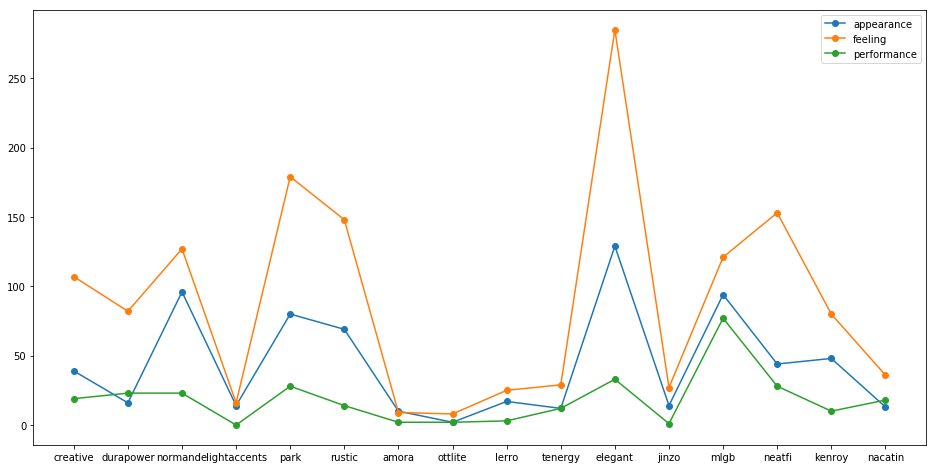

In [7]:
analyze.all_brand_compare('volume', ['appearance', 'feeling', 'performance'])

In [4]:
analyze.list_feature()

['size', 'performance', 'appearance', 'quality', 'functionality', 'price', 'feeling', 'service', 'target']


In [7]:
analyze.list_product()

[New Model] Neatfi Bifocals 1,200 Lumens Super LED Magnifying Lamp with Clamp | 5 Diopter with 20 Diopter | Dimmable | 60PCS SMD LED | 5" Diameter Lens | Adjustable Arm Utility Clamp (Black)
Neatfi 1,200 Lumens Super LED Magnifying Lamp with Clamp | Dimmable | Microfiber Cleaning Cloth Included | 60PCS SMD LED | 5 Diopter | 5" Diameter Lens (White)
Durapower Headlamp Super Bright 2 Modes Led Headlamp with Zoomable Focusing and Adjustable Lighting Angle and Water Resistant Function Include 3 AAA Batteries
Normande Lighting qCOM-2648A-3PK Lamp, qBronze
Park Madison Lighting PMT-1815-20 Two Piece Table and Floor Lamp Set in Bronze Finish with Hand Crafted Shades, Table Lamp - 22 1/4" Tall, Floor Lamp - 60" Tall
Kenroy Home Rowan Buffet Lamp, 1, Brown
Tenergy Torchiere Dimmable LED Floor Lamp, Remote Controlled 30W (150W Equivalent) Standing Lamp with Stepless Touch Dimmer, 90° Adjustable Top, Wall Switch Smart Outlet Compatible, Warm White Light
MLGB Alexa WiFi Smart Wood Table Lamp, Dimm

In [8]:
analyze.list_brand()

Creative Hobbies
JINZO
Lerro
Normande Lighting
Tenergy
Elegant Designs
Durapower
MLGB
Rustic State
LIGHTACCENTS
Park Madison Lighting
Kenroy Home
Amora Lighting
Neatfi
NACATIN
OttLite


In [5]:
analyze.keyword('functionality', 'JINZO', 1)

,term,tf,sent,not
13,light,7,0.295867,2
6,bright,4,0.651450,1
12,dim,3,0.440400,0
38,lighting,1,0.611400,0
42,illumination,1,0.000000,0
7,incandescent,1,0.000000,0
50,nightlight,1,0.000000,0


In [8]:
analyze.set_time_interval((2017,1,1), (2019,1,1))

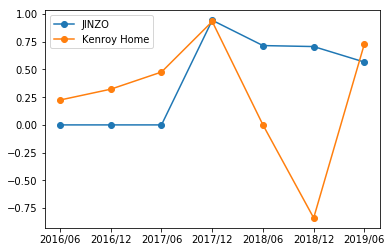

In [6]:
analyze.two_brand_compare('JINZO', 'Kenroy Home')

In [4]:
analyze.brand_overview()

100%|██████████| 66/66 [30:58<00:00, 23.57s/it]


,size,performance,appearance,quality,functionality,price,feeling,service,target
Lerro,"[(lot, 1, 0.1027, 0)]","[(warm, 1, 0, 0)]","[(black, 3, 0.31245, 0), (beautiful, 2, 0.0, 0...","[(solve, 1, 0, 0), (sturdy, 1, 0, 0)]","[(light, 4, 0.20095, 0), (bright, 2, 0.4665, 0...","[(cheaply, 1, -0.2391, 0)]","[(very, 7, 0.25525000000000003, 0), (great, 4,...","[(recommend, 3, 0.474, 0)]","[(desk, 4, 0.20610000000000003, 0), (son, 1, 0..."
MLGB,"[(couple, 4, 0.1774, 0), (lot, 4, 0.5071, 0), ...","[(warm, 3, 0.4921, 0), (excellent, 1, 0.0, 0),...","[(color, 45, 0.24608333333333335, 4), (shade, ...","[(sturdy, 2, 0.0, 0), (flimsy, 2, 0.0, 0), (ge...","[(light, 42, 0.26156399999999996, 5), (bright,...","[(cheap, 13, -0.1156375, 1), (cheaply, 2, -0.0...","[(great, 29, 0.5041692307692308, 2), (very, 28...","[(instruction, 14, 0.0, 0), (setup, 10, 0.3104...","[(daughter, 3, 0.3234, 0), (table, 3, 0.297, 1..."
Neatfi,"[(lot, 8, 0.16419999999999998, 0), (large, 8, ...","[(excellent, 8, 0.69075, 0), (downside, 1, -0....","[(color, 6, 0.44449999999999995, 0), (paint, 3...","[(solid, 4, 0.8625, 1), (sturdy, 3, 0.28750000...","[(light, 96, 0.3209307692307692, 10), (bright,...","[(cheap, 3, 0.0, 1), (expensive, 1, 0.0, 0)]","[(very, 52, 0.3486393939393939, 5), (great, 49...","[(recommend, 9, 0.33565, 1), (delivery, 4, 0.4...","[(table, 12, 0.38581666666666664, 2), (desk, 1..."
Miady,[],[],[],[],[],[],[],[],[]
Creative Hobbies,"[(large, 5, 0.0, 0), (diameter, 2, 0.010599999...","[(excellent, 2, 0.0, 0), (burn, 2, 0.6124, 1),...","[(silver, 12, 0.26961, 1), (black, 5, 0.18674,...","[(solid, 3, 0.369, 1), (durability, 1, 0.0, 1)...","[(adapter, 13, -0.09866666666666667, 0), (ligh...","[(cheap, 3, 0.4877, 0), (expensive, 2, 0.0, 0)...","[(great, 25, 0.6581666666666667, 1), (very, 24...","[(instruction, 14, 0.0, 0), (recommend, 5, 0.3...","[(friend, 2, 0, 0), (husband, 1, 0, 0), (son, ..."
Tenergy,"[(many, 2, 0.0, 0), (tall, 1, 0.0, 0), (lightw...","[(warm, 1, 0.2263, 0), (hot, 1, 0.1754, 1), (b...","[(color, 1, 0.2263, 0), (aesthetic, 1, 0.4215,...","[(noise, 1, -0.296, 1), (best, 1, 0.7964, 0), ...","[(light, 16, 0.2492875, 2), (brightness, 6, 0....",[],"[(very, 10, -0.0115625, 2), (great, 4, 0.8591,...","[(recommend, 2, 0.4201, 0), (hard, 2, -0.1027,...","[(wife, 1, 0.0, 0), (headboard, 1, 0.0, 0)]"
Elegant Designs,"[(heavy, 13, 0.28931250000000003, 2), (tall, 1...","[(excellent, 6, 0.77165, 0), (warm, 1, 0.8051,...","[(shade, 38, 0.09565555555555555, 4), (beautif...","[(sturdy, 10, 0.2826, 1), (solid, 6, 0.4430333...","[(light, 21, 0.23692000000000002, 4), (pole, 2...","[(cheap, 9, -0.119175, 3), (expensive, 6, 0.31...","[(very, 73, 0.38408124999999993, 0), (great, 6...","[(assemble, 20, 0.6128625000000001, 0), (recom...","[(table, 24, 0.15643333333333337, 6), (husband..."
NACATIN,"[(lot, 2, 0.0, 0), (tall, 1, 0.2263, 0), (few,...","[(warm, 4, 0.45856666666666673, 0), (cold, 1, ...","[(color, 8, 0.526425, 0), (wood, 1, 0.0, 0)]","[(optimal, 2, 0.5267, 0), (flimsy, 2, 0.7506, ...","[(light, 27, 0.42069444444444454, 2), (bright,...","[(affordable, 1, 0.6588, 0)]","[(very, 12, 0.33404, 0), (great, 8, 0.6855, 0)...","[(assemble, 6, 0.57065, 0), (idiot, 1, 0.0, 0)...","[(headboard, 2, 0.33330000000000004, 0), (desk..."
Rustic State,"[(large, 6, 0.1806, 1), (wide, 1, 0.0, 0), (he...","[(excellent, 4, 0.4239333333333333, 0), (warm,...","[(black, 10, 0.1398875, 0), (vintage, 9, 0.428...","[(solid, 3, 0.3399, 0), (sturdy, 3, 0.0, 0), (...","[(light, 59, 0.17383783783783785, 5), (dim, 5,...","[(cheap, 2, 0, 0), (affordable, 1, 0, 0)]","[(great, 36, 0.6785500000000002, 0), (very, 33...","[(install, 4, 0.0, 0), (delivery, 2, -0.0258, ...","[(desk, 3, 0.4336, 0), (wife, 2, 0.0, 0), (dau..."
LIGHTACCENTS,"[(lot, 1, 0.0, 0), (max, 1, 0.5719, 0), (heavy...",[],"[(gray, 3, 0.11273333333333334, 0), (beige, 3,...","[(flimsy, 2, -0.1122, 0), (max, 1, 0.5719, 0)]","[(light, 8, 0.3121833333333333, 1), (pole, 1, ...","[(cheaply, 1, 0.0, 0)]","[(great, 5, 0.6249, 0), (ver

# Labeling (Manual) - 手動標label
1. CreatingMatrix(input_path) : input IAC 整理IAC間的相似性
2. Labeling() : 手動標，標完會自動標剩下沒有分群到的
3. Add(詞彙, feature) : 詞彙應為list，可以手動將一些詞彙新增進辭典
4. Save(output_path) : 存檔

In [18]:
import Labeling

In [19]:
label = Labeling.Labeling()

In [20]:
label.CreatingMatrix('LampSet/IAC.pkl')

100%|██████████| 1600/1600 [00:50<00:00, 31.46it/s]


In [21]:
label.Labeling()

類別：0:size/1:performance/2:appearance/3:quality/4:functionality/5:price/6:feeling/7:service/8:target/9:discard
請輸入['awesome', 'excellent', 'incredible', 'exceptional', 'amazing']的類別:6
類別：0:size/1:performance/2:appearance/3:quality/4:functionality/5:price/6:feeling/7:service/8:target/9:discard
請輸入['tightly', 'securely', 'secure']的類別:9
類別：0:size/1:performance/2:appearance/3:quality/4:functionality/5:price/6:feeling/7:service/8:target/9:discard
請輸入['narrow', 'wide', 'tall']的類別:0
類別：0:size/1:performance/2:appearance/3:quality/4:functionality/5:price/6:feeling/7:service/8:target/9:discard
請輸入['stopper', 'seal', 'lid']的類別:9
類別：0:size/1:performance/2:appearance/3:quality/4:functionality/5:price/6:feeling/7:service/8:target/9:discard
請輸入['fixture', 'overhead', 'illuminate']的類別:4
類別：0:size/1:performance/2:appearance/3:quality/4:functionality/5:price/6:feeling/7:service/8:target/9:discard
請輸入['minimalist', 'chic', 'handsome', 'contemporary']的類別:2
類別：0:size/1:performance/2:appearance/3:quality/4:f

類別：0:size/1:performance/2:appearance/3:quality/4:functionality/5:price/6:feeling/7:service/8:target/9:discard
請輸入['black', 'grey', 'gray', 'colored', 'silver']的類別:1
類別：0:size/1:performance/2:appearance/3:quality/4:functionality/5:price/6:feeling/7:service/8:target/9:discard
請輸入['remote', 'hub', 'receiver']的類別:9
類別：0:size/1:performance/2:appearance/3:quality/4:functionality/5:price/6:feeling/7:service/8:target/9:discard
請輸入['esthetician', 'idiot', 'ordinary', 'amateur']的類別:9
類別：0:size/1:performance/2:appearance/3:quality/4:functionality/5:price/6:feeling/7:service/8:target/9:discard
請輸入['pull', 'lift', 'slide']的類別:9
類別：0:size/1:performance/2:appearance/3:quality/4:functionality/5:price/6:feeling/7:service/8:target/9:discard
請輸入['evening', 'day', 'morning']的類別:9
類別：0:size/1:performance/2:appearance/3:quality/4:functionality/5:price/6:feeling/7:service/8:target/9:discard
請輸入['hot', 'warm', 'cold']的類別:9
類別：0:size/1:performance/2:appearance/3:quality/4:functionality/5:price/6:feeling/7:serv

In [22]:
label.Add(['small', 'large'], 'size')
label.Add(['narrow'], 'size')

In [23]:
label.Save('LampSet/dictionary_manual.pkl')

In [24]:
len([item for sublist in label.dictionary.values() for item in sublist])

196